# Inference with pre-trained model

In [ ]:
from rfdetr import RFDETRBase
from rfdetr.util.coco_classes import COCO_CLASSES
import supervision as sv
import numpy as np
from PIL import Image

model = RFDETRBase(pretained_weights='../models/baseline/rf-detr-base.pth')
history = []

def callback2(data):
    history.append(data)

model.callbacks["on_fit_epoch_end"].append(callback2)

model.train(dataset_dir='../data/sorghum', epochs=30, batch_size=2, output_dir='../runs/sorghum_detr_detector/')

Loading pretrain weights


num_classes mismatch: model has 90 classes, but your dataset has 3 classes
reinitializing your detection head with 3 classes.


Not using distributed mode
git:
  sha: 16f4a78df278a4d8090d8c5c9dc6f18becb32750, status: has uncommited changes, branch: main

Namespace(num_classes=3, grad_accum_steps=4, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=2, weight_decay=0.0001, epochs=30, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-base.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[2, 5, 8, 11], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=3, dim_feedforward=2048, hidden_dim=256, sa_nheads=8, ca_nheads=16, num_queries=300, group_detr=13, two_stage=True, projector_scale=['P4']

Epoch: [0]  [ 0/23]  eta: 0:01:36  lr: 0.000100  class_error: 38.46  loss: 14.2304 (14.2304)  loss_ce: 0.9880 (0.9880)  loss_bbox: 1.6079 (1.6079)  loss_giou: 0.8879 (0.8879)  loss_ce_0: 0.9686 (0.9686)  loss_bbox_0: 1.7057 (1.7057)  loss_giou_0: 0.8893 (0.8893)  loss_ce_1: 0.9879 (0.9879)  loss_bbox_1: 1.6294 (1.6294)  loss_giou_1: 0.8729 (0.8729)  loss_ce_enc: 0.9591 (0.9591)  loss_bbox_enc: 1.7788 (1.7788)  loss_giou_enc: 0.9550 (0.9550)  loss_ce_unscaled: 0.9880 (0.9880)  class_error_unscaled: 38.4615 (38.4615)  loss_bbox_unscaled: 0.3216 (0.3216)  loss_giou_unscaled: 0.4439 (0.4439)  cardinality_error_unscaled: 2807.0000 (2807.0000)  loss_ce_0_unscaled: 0.9686 (0.9686)  loss_bbox_0_unscaled: 0.3411 (0.3411)  loss_giou_0_unscaled: 0.4447 (0.4447)  cardinality_error_0_unscaled: 3778.5000 (3778.5000)  loss_ce_1_unscaled: 0.9879 (0.9879)  loss_bbox_1_unscaled: 0.3259 (0.3259)  loss_giou_1_unscaled: 0.4365 (0.4365)  cardinality_error_1_unscaled: 3851.5000 (3851.5000)  loss_ce_enc_unsca

Test:  [ 0/27]  eta: 0:00:06  class_error: 0.00  loss: 7.3886 (7.3886)  loss_ce: 0.8945 (0.8945)  loss_bbox: 0.4852 (0.4852)  loss_giou: 0.4513 (0.4513)  loss_ce_0: 1.2188 (1.2188)  loss_bbox_0: 0.3101 (0.3101)  loss_giou_0: 0.3475 (0.3475)  loss_ce_1: 0.9844 (0.9844)  loss_bbox_1: 0.4834 (0.4834)  loss_giou_1: 0.4445 (0.4445)  loss_ce_enc: 1.3516 (1.3516)  loss_bbox_enc: 0.1810 (0.1810)  loss_giou_enc: 0.2363 (0.2363)  loss_ce_unscaled: 0.8945 (0.8945)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0970 (0.0970)  loss_giou_unscaled: 0.2257 (0.2257)  cardinality_error_unscaled: 65.0000 (65.0000)  loss_ce_0_unscaled: 1.2188 (1.2188)  loss_bbox_0_unscaled: 0.0620 (0.0620)  loss_giou_0_unscaled: 0.1738 (0.1738)  cardinality_error_0_unscaled: 118.0000 (118.0000)  loss_ce_1_unscaled: 0.9844 (0.9844)  loss_bbox_1_unscaled: 0.0967 (0.0967)  loss_giou_1_unscaled: 0.2223 (0.2223)  cardinality_error_1_unscaled: 104.5000 (104.5000)  loss_ce_enc_unscaled: 1.3516 (1.3516)  loss_bbox_

In [16]:
model.export(output_dir='../models/finetune')

Exporting model to ONNX format
PyTorch inference output shapes - Boxes: torch.Size([1, 300, 4]), Labels: torch.Size([1, 300, 3])

Successfully exported ONNX model: ../models/finetune/inference_model.onnx
Successfully exported ONNX model to: ../models/finetune/inference_model.onnx
ONNX export completed successfully


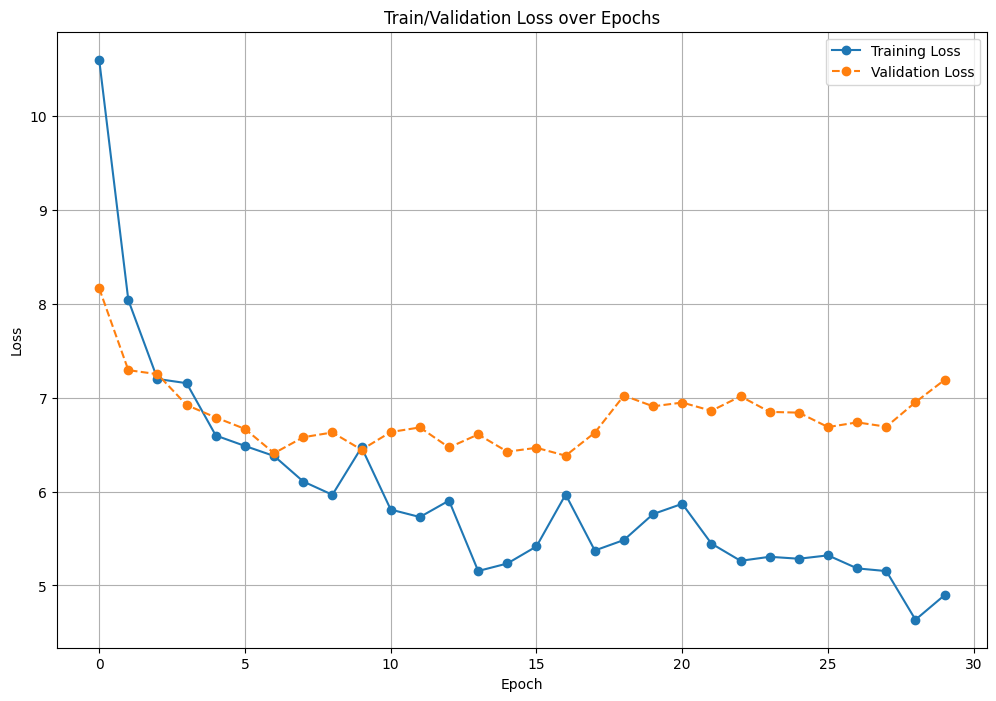

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(history)

plt.figure(figsize=(12, 8))

plt.plot(
    df['epoch'],
    df['train_loss'],
    label='Training Loss',
    marker='o',
    linestyle='-'
)

plt.plot(
    df['epoch'],
    df['test_loss'],
    label='Validation Loss',
    marker='o',
    linestyle='--'
)

plt.title('Train/Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

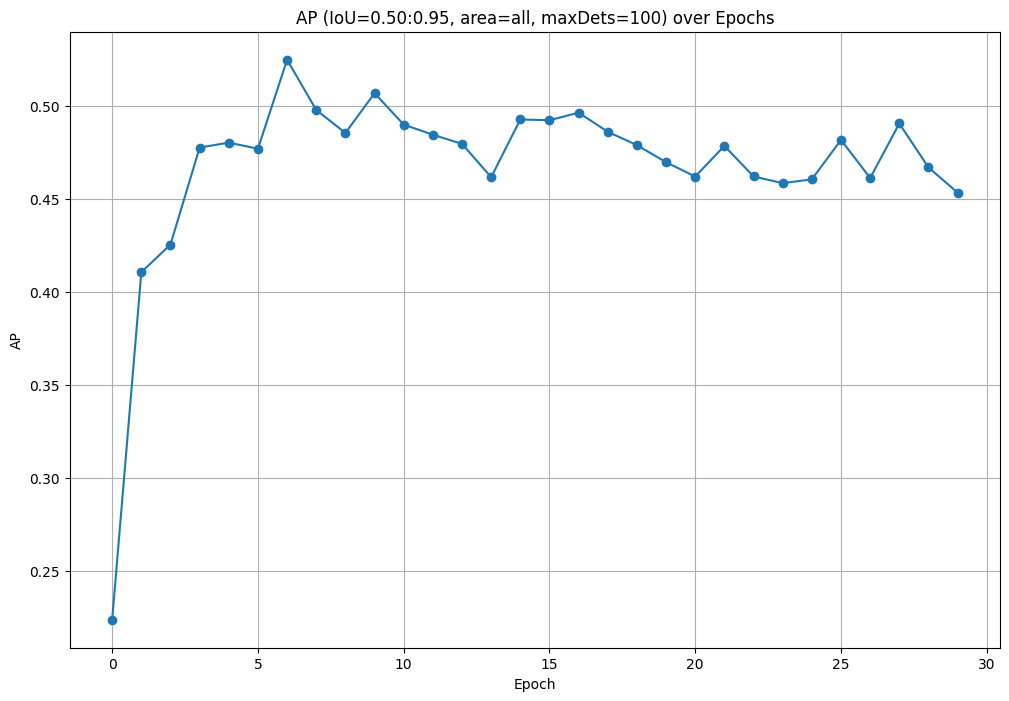

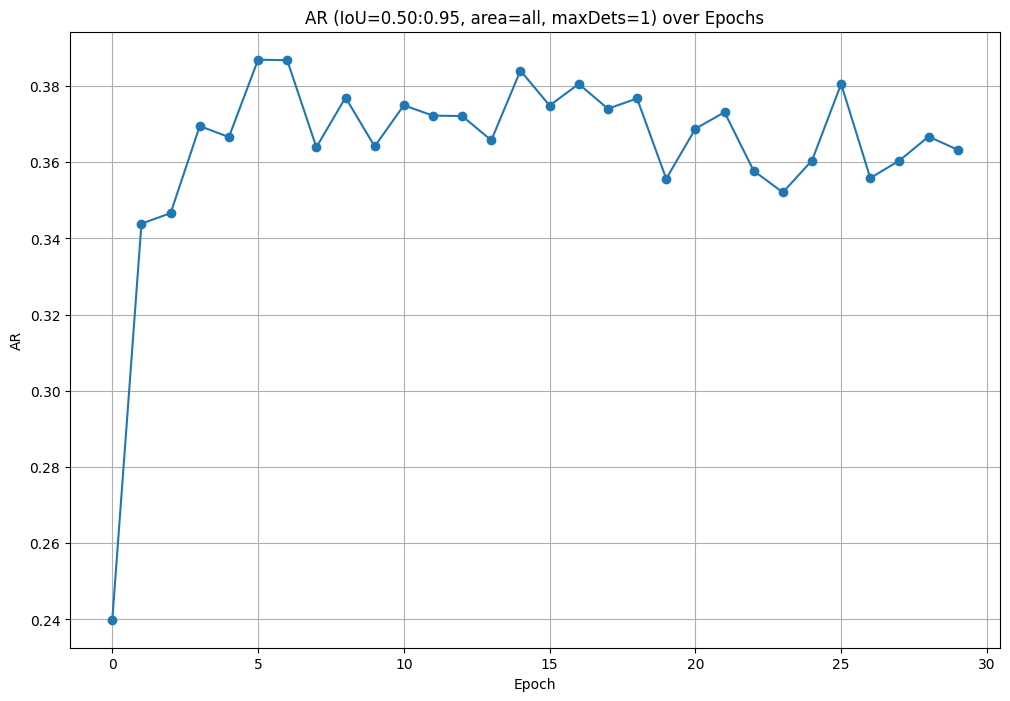

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(history)

df['avg_precision'] = df['test_coco_eval_bbox'].apply(lambda arr: arr[0])
df['avg_recall'] = df['test_coco_eval_bbox'].apply(lambda arr: arr[6])

plt.figure(figsize=(12, 8))
plt.plot(
    df['epoch'],
    df['avg_precision'],
    marker='o',
    linestyle='-'
)
plt.title('AP (IoU=0.50:0.95, area=all, maxDets=100) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('AP')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 8))
plt.plot(
    df['epoch'],
    df['avg_recall'],
    marker='o',
    linestyle='-'
)
plt.title('AR (IoU=0.50:0.95, area=all, maxDets=1) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('AR')
plt.grid(True)
plt.show()

In [4]:
ds = sv.DetectionDataset.from_coco(
    images_directory_path=f"../data/sorghum/test",
    annotations_path=f"../data/sorghum/test/_annotations.coco.json",
)

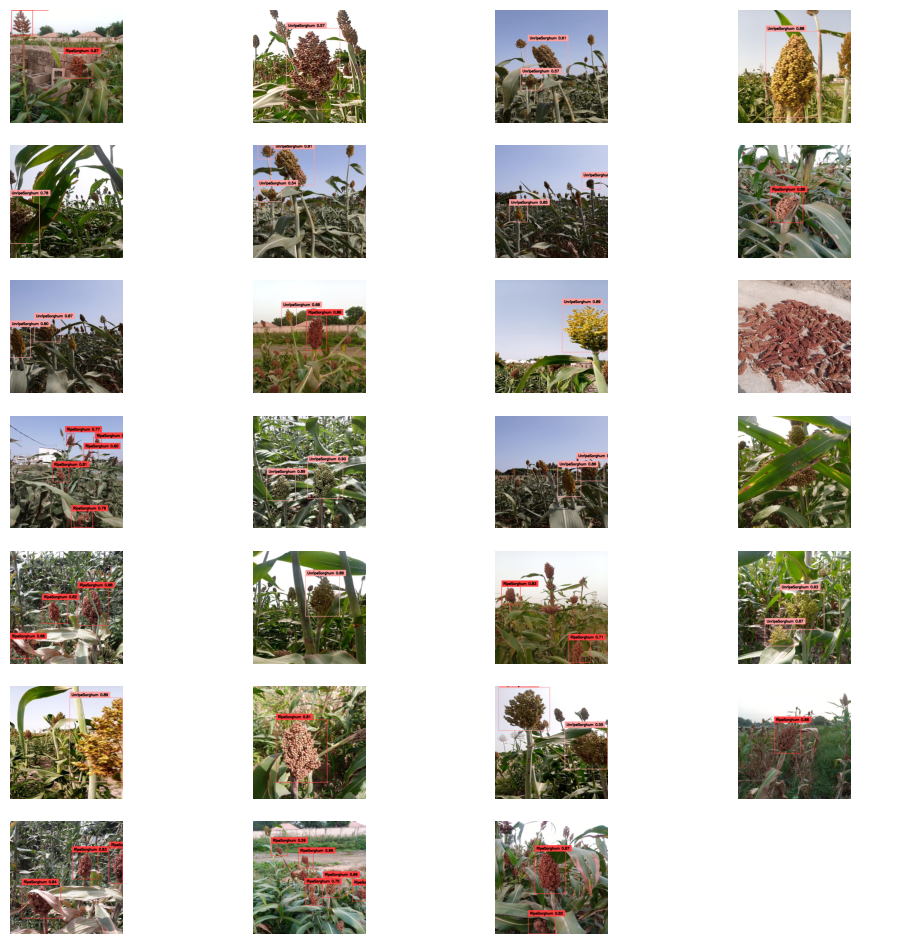

In [ ]:
detections_images = []

for i in range(len(ds)):
    path, image, annotations = ds[i]
    image = Image.open(path)

    detections = model.predict(image, threshold=0.5)

    text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
    thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

    bbox_annotator = sv.BoxAnnotator(thickness=thickness)
    label_annotator = sv.LabelAnnotator(
        text_color=sv.Color.BLACK,
        text_scale=text_scale,
        text_thickness=thickness,
        smart_position=True)

    detections_labels = [
        f"{ds.classes[class_id]} {confidence:.2f}"
        for class_id, confidence
        in zip(detections.class_id, detections.confidence)
    ]

    detections_image = image.copy()
    detections_image = bbox_annotator.annotate(detections_image, detections)
    detections_image = label_annotator.annotate(detections_image, detections, detections_labels)

    detections_images.append(detections_image)

sv.plot_images_grid(images=detections_images, grid_size=(7, 4))

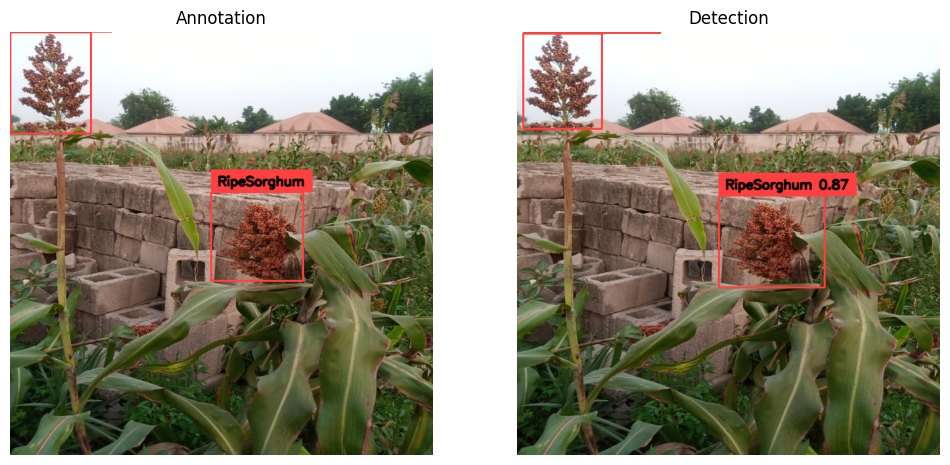

In [13]:
from rfdetr import RFDETRBase
import supervision as sv
from PIL import Image

path, image, annotations = ds[0]
image = Image.open(path)

detections = model.predict(image, threshold=0.5)

text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

bbox_annotator = sv.BoxAnnotator(thickness=thickness)
label_annotator = sv.LabelAnnotator(
    text_color=sv.Color.BLACK,
    text_scale=text_scale,
    text_thickness=thickness,
    smart_position=True)

annotations_labels = [
    f"{ds.classes[class_id]}"
    for class_id
    in annotations.class_id
]

detections_labels = [
    f"{ds.classes[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotation_image = image.copy()
annotation_image = bbox_annotator.annotate(annotation_image, annotations)
annotation_image = label_annotator.annotate(annotation_image, annotations, annotations_labels)

detections_image = image.copy()
detections_image = bbox_annotator.annotate(detections_image, detections)
detections_image = label_annotator.annotate(detections_image, detections, detections_labels)

sv.plot_images_grid(images=[annotation_image, detections_image], grid_size=(1, 2), titles=["Annotation", "Detection"])

100%|██████████| 27/27 [00:02<00:00, 10.89it/s]


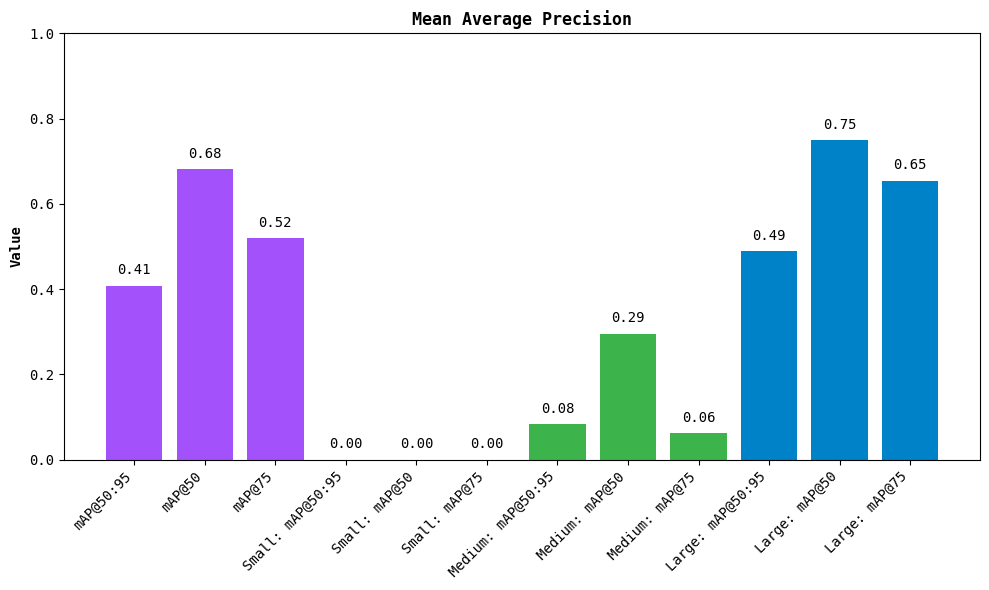

In [9]:
import supervision as sv
from tqdm import tqdm
from supervision.metrics import MeanAveragePrecision

targets = []
predictions = []

for path, image, annotations in tqdm(ds):
    image = Image.open(path)
    detections = model.predict(image, threshold=0.5)

    targets.append(annotations)
    predictions.append(detections)

map_metric = MeanAveragePrecision()
map_result = map_metric.update(predictions, targets).compute()

map_result.plot()

In [ ]:
confusion_matrix = sv.ConfusionMatrix.from_detections(
    predictions=predictions,
    targets=targets,
    classes=model.names
)

_ = confusion_matrix.plot()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_detr = pd.read_json('../runs/sorghum_detr_detector/log.txt', lines=True)
df_yolo = pd.read_csv('../runs/sorghum_yolo_detector/train/results.csv')

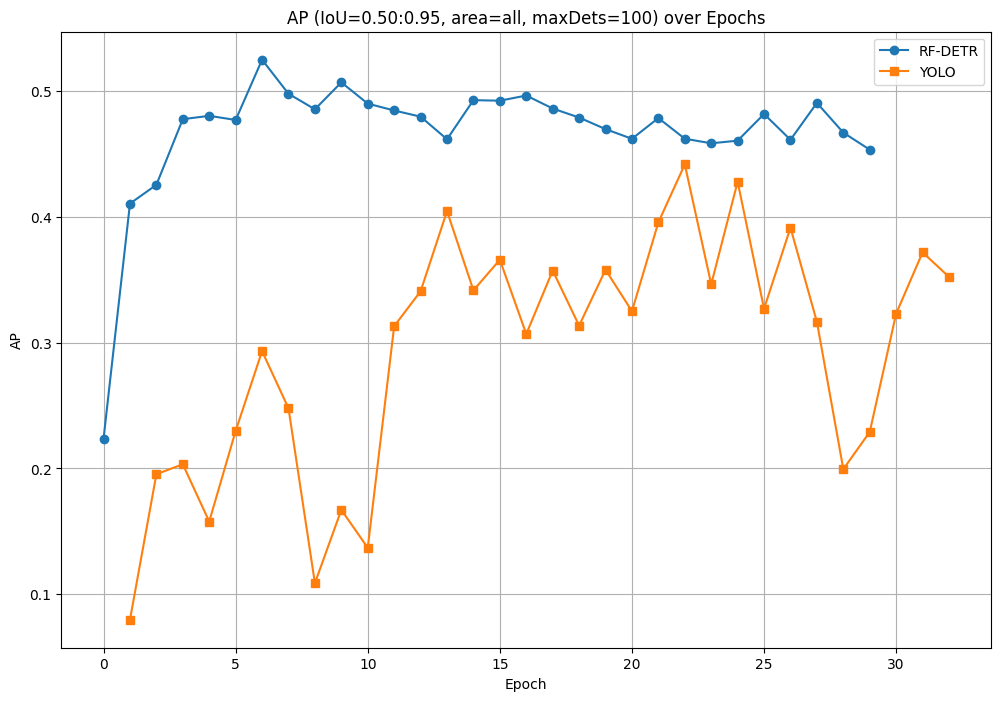

In [15]:
detr_map = df_detr['test_coco_eval_bbox'].apply(lambda arr: arr[0])
detr_mar = df_detr['test_coco_eval_bbox'].apply(lambda arr: arr[6])

plt.figure(figsize=(12, 8))
plt.plot(
    df_detr['epoch'],
    detr_map,
    marker='o',
    linestyle='-',
    label='RF-DETR'
)
plt.plot(
    df_yolo['epoch'],  # Asegúrate de que tienes la columna de época en df_yolo
    df_yolo['metrics/mAP50-95(B)'],
    marker='s',
    linestyle='-',
    label='YOLO'
)
plt.title('AP (IoU=0.50:0.95, area=all, maxDets=100) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('AP')
plt.grid(True)
plt.legend()
plt.show()